#Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, StratifiedKFold

#Loading Data

In [3]:
file_path = "/content/drive/MyDrive/IS733/Labs/Lab6/student_data.csv"

df = pd.read_csv(file_path)

#Task 1b

## 1. Creating Visualization of Data

###i. Histogram for hours_studied

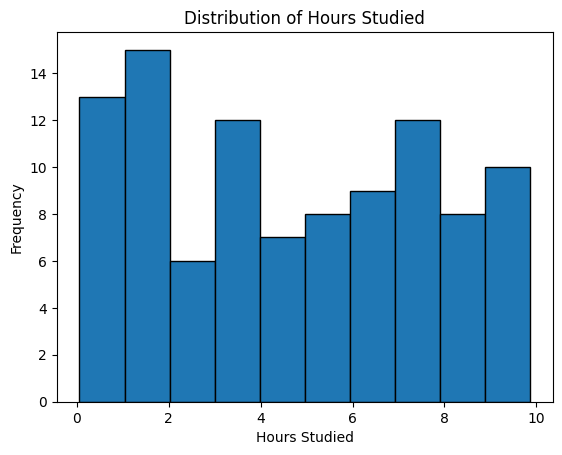

In [4]:
plt.hist(df['Hours_Studied'], bins=10, edgecolor='black')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.title('Distribution of Hours Studied')
plt.show()


###ii. Countplot for review_session

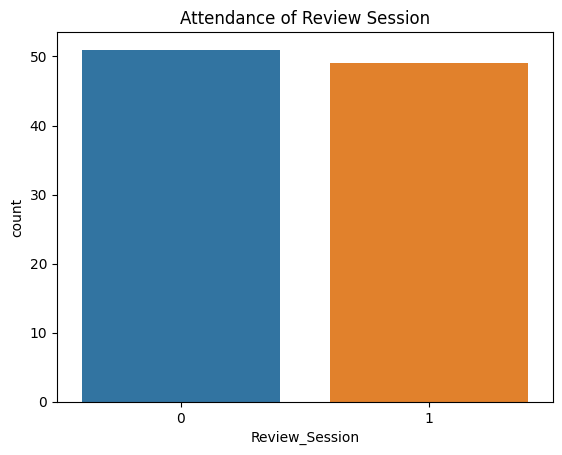

In [5]:

sns.countplot(x='Review_Session', data=df)
plt.title('Attendance of Review Session')
plt.show()


###iii. Countplot for results

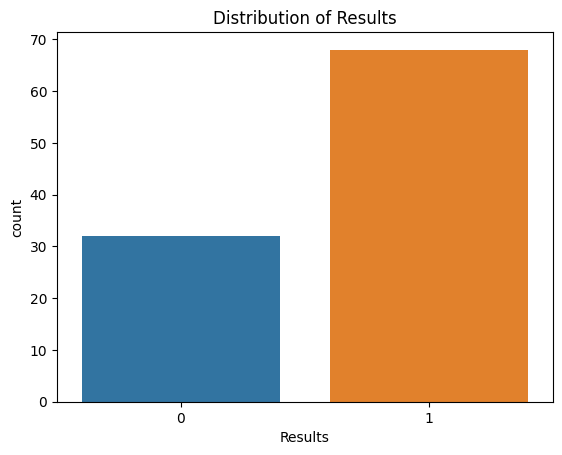

In [6]:
sns.countplot(x='Results', data=df)
plt.title('Distribution of Results')
plt.show()

###iv. Boxplot of hours_studied grouped by results

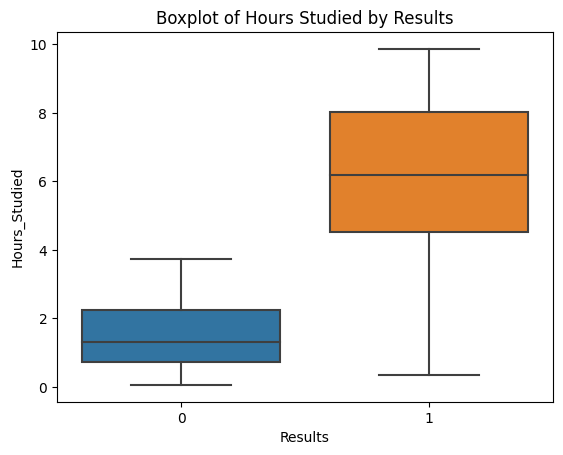

In [7]:
sns.boxplot(x='Results', y='Hours_Studied', data=df)
plt.title('Boxplot of Hours Studied by Results')
plt.show()

###v. Stacked bar chart

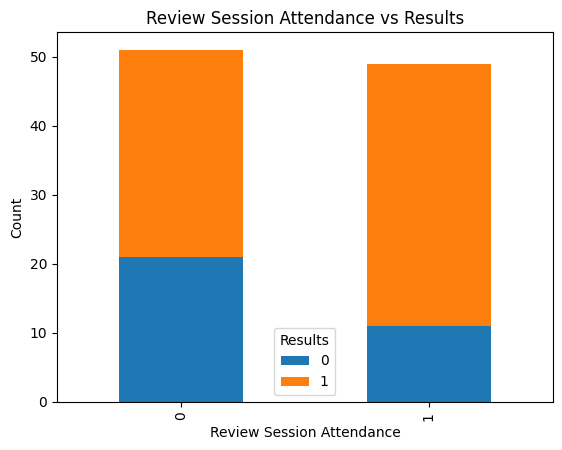

In [8]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['Review_Session'], df['Results'])

cross_tab.plot(kind='bar', stacked=True)
plt.title('Review Session Attendance vs Results')
plt.xlabel('Review Session Attendance')
plt.ylabel('Count')
plt.show()

###vi. Heatmap

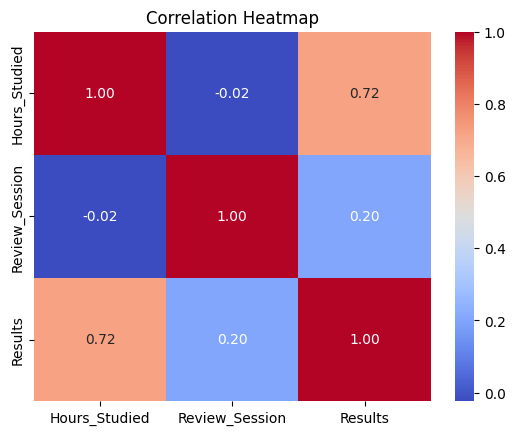

In [9]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## 2. Fit Model Using Logestic Regression

In [10]:
# Assuming 'hours_studied' and 'review_session' are features, and 'results' is the target variable
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Standardize the features (optional, but can be beneficial for logistic regression)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

LogisticRegression()

## 3. Output Model Coefficients and Performance Metrics

Model Coefficients:
Hours_studied: 3.001319831183545
Review_session: 1.0038195505419958

Model Performance Metrics:
Accuracy: 0.9200
AUC: 0.9164
Confusion Matrix:
[[29  3]
 [ 5 63]]


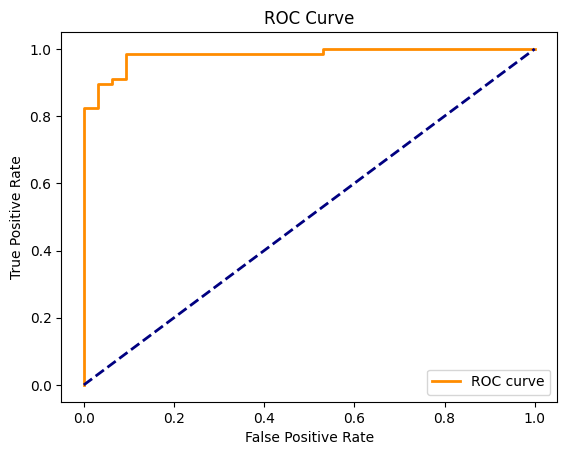

In [12]:
# Make predictions on the same dataset
y_pred = model.predict(X)

# Output model coefficients
print("Model Coefficients:")
for feature, coefficient in zip(['Hours_studied', 'Review_session'], model.coef_[0]):
    print(f"{feature}: {coefficient}")

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, model.predict_proba(X)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


#Task 2

## 1. Linear Kernel

Mean AUC: 0.9779


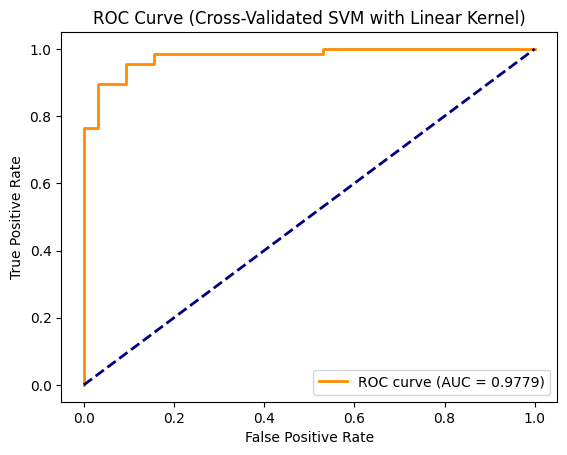


Mean Accuracy: 0.9100

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        32
           1       0.97      0.90      0.93        68

    accuracy                           0.91       100
   macro avg       0.89      0.92      0.90       100
weighted avg       0.92      0.91      0.91       100


Confusion Matrix:
[[30  2]
 [ 7 61]]


In [20]:
# Standardize the features (SVMs are sensitive to feature scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Support Vector Machine model with a linear kernel
svm_model = SVC(kernel='linear', probability=True)  # Set probability to True for ROC curve

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits

# Get predicted probabilities during cross-validation
y_prob_cv = cross_val_predict(svm_model, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]

# Calculate AUC
auc_cv = roc_auc_score(y, y_prob_cv)
print(f"Mean AUC: {auc_cv:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_prob_cv)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(auc_cv))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validated SVM with Linear Kernel)')
plt.legend(loc="lower right")
plt.show()

# Get predicted labels during cross-validation
y_pred_cv = cross_val_predict(svm_model, X, y, cv=cv)

# Calculate accuracy
accuracy_cv = accuracy_score(y, y_pred_cv)
print(f"\nMean Accuracy: {accuracy_cv:.4f}")

# Print classification report
classification_report_cv = classification_report(y, y_pred_cv)
print("\nClassification Report:")
print(classification_report_cv)

# Print confusion matrix
conf_matrix_cv = confusion_matrix(y, y_pred_cv)
print("\nConfusion Matrix:")
print(conf_matrix_cv)

## 2. RBF Kernel

Mean AUC: 0.9720


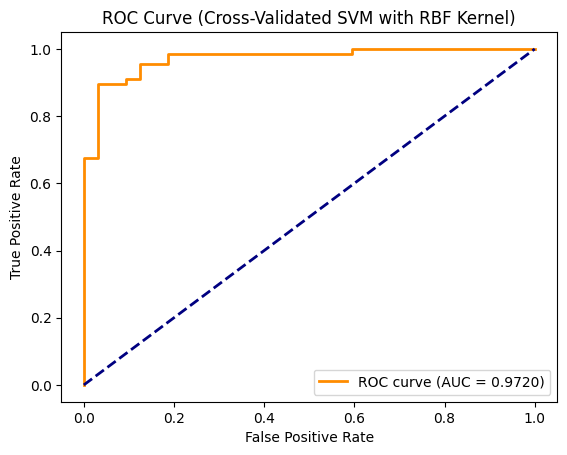


Mean Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.95      0.90      0.92        68

    accuracy                           0.90       100
   macro avg       0.88      0.90      0.89       100
weighted avg       0.91      0.90      0.90       100


Confusion Matrix:
[[29  3]
 [ 7 61]]


In [21]:
# Standardize the features (SVMs are sensitive to feature scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a Support Vector Machine model with an RBF kernel
svm_model_rbf = SVC(kernel='rbf', probability=True)  # Set probability to True for ROC curve

# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # You can adjust the number of splits

# Get predicted probabilities during cross-validation
y_prob_cv_rbf = cross_val_predict(svm_model_rbf, X, y, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]

# Calculate AUC
auc_cv_rbf = roc_auc_score(y, y_prob_cv_rbf)
print(f"Mean AUC: {auc_cv_rbf:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y, y_prob_cv_rbf)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.4f})'.format(auc_cv_rbf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Cross-Validated SVM with RBF Kernel)')
plt.legend(loc="lower right")
plt.show()

# Get predicted labels during cross-validation
y_pred_cv_rbf = cross_val_predict(svm_model_rbf, X, y, cv=cv)

# Calculate accuracy
accuracy_cv_rbf = accuracy_score(y, y_pred_cv_rbf)
print(f"\nMean Accuracy: {accuracy_cv_rbf:.4f}")

# Print classification report
classification_report_cv_rbf = classification_report(y, y_pred_cv_rbf)
print("\nClassification Report:")
print(classification_report_cv_rbf)

# Print confusion matrix
conf_matrix_cv_rbf = confusion_matrix(y, y_pred_cv_rbf)
print("\nConfusion Matrix:")
print(conf_matrix_cv_rbf)